# Heart Disease Prediction Dataset

In [247]:
pip install xgboost

In [248]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [249]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report , roc_auc_score, roc_curve
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [250]:
df = pd.read_csv(r"C:\Users\HP\Downloads\heart.csv")

In [251]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [253]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [254]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [255]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [256]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Sex
M    725
F    193
Name: Sex, dtype: int64

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

RestingECG
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64

ST_Slope
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64



## **Exploratory Data Analysis**

<Axes: xlabel='Age', ylabel='Density'>

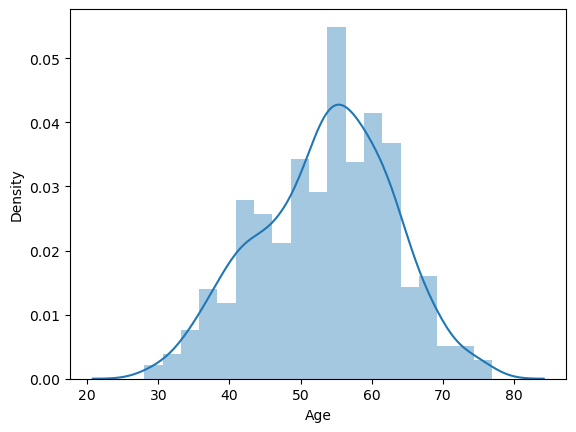

In [257]:
sns.distplot(df['Age'])

As we can see here the maximum amount of people's age is btw 50-60

<Axes: xlabel='RestingBP', ylabel='Density'>

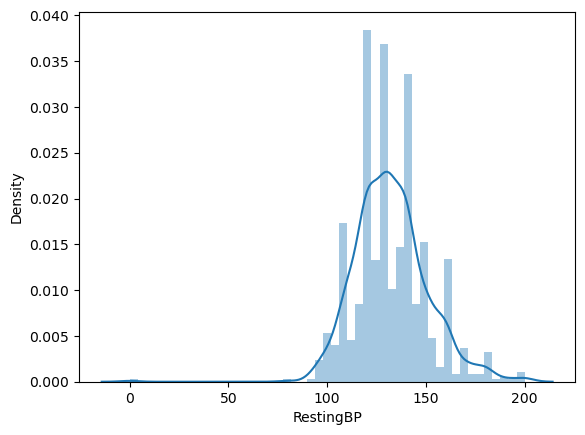

In [258]:
sns.distplot(df['RestingBP'])

<Axes: xlabel='Cholesterol', ylabel='Density'>

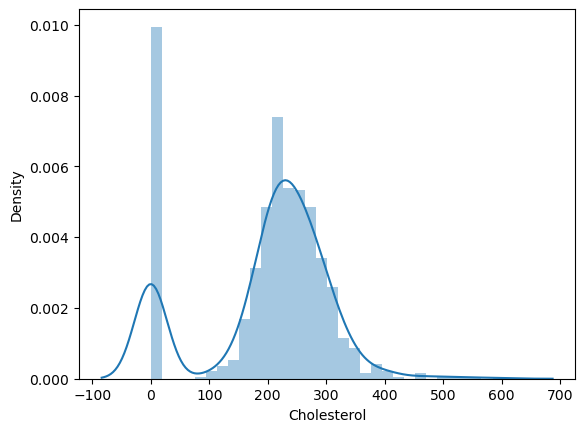

In [259]:
sns.distplot(df['Cholesterol'])

As per the grapth the some peoples having cholesterol 0 br its not possible ..so we will deal with it by imputation.

<Axes: xlabel='FastingBS', ylabel='Density'>

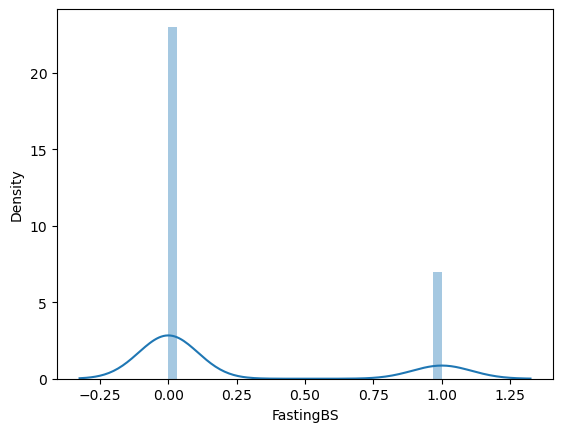

In [260]:
sns.distplot(df['FastingBS'])

Peoples having FastingBS are either 0 or 1

<Axes: xlabel='MaxHR', ylabel='Density'>

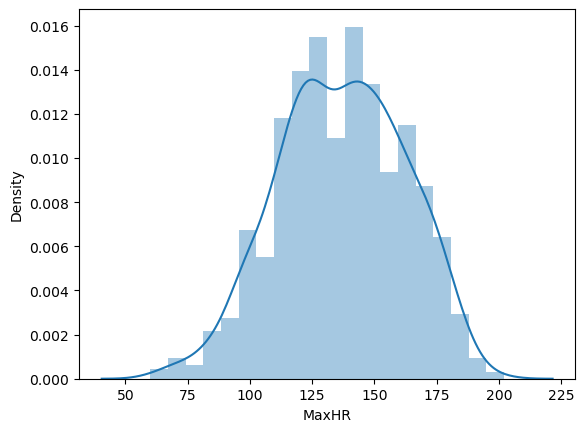

In [261]:
sns.distplot(df['MaxHR'])

<Axes: xlabel='Oldpeak', ylabel='Density'>

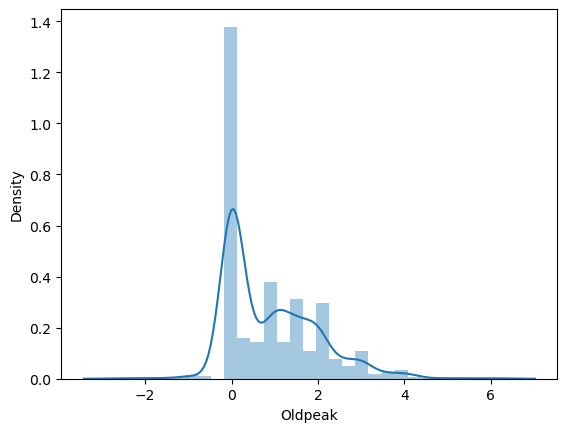

In [262]:
sns.distplot(df['Oldpeak'])

<Axes: xlabel='Sex', ylabel='count'>

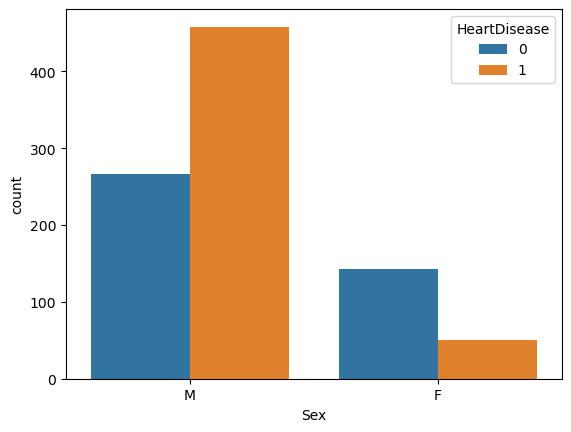

In [263]:
sns.countplot(x='Sex',hue = 'HeartDisease',data = df)

Here  we can see that as per graph the heartdisease mostly occurs in males as compare to females.Out of 725 male candidates approx 450+ males have heartdisease and out of 193 female candidates approx near to 50 female candidates have heartdisease.

<Axes: xlabel='ChestPainType', ylabel='count'>

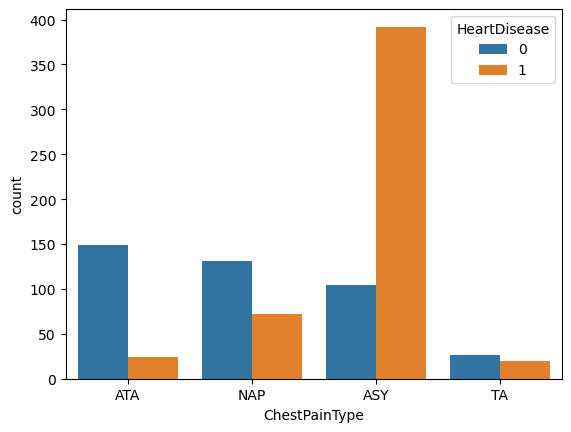

In [264]:
sns.countplot(x='ChestPainType',hue = 'HeartDisease',data = df)

Here we can see that as per graph the persons who has chestpain type ASY those having more number of heartdisease & Similarly the persons who has chestpain type TA are having less number of heartdisease.

<Axes: xlabel='RestingECG', ylabel='count'>

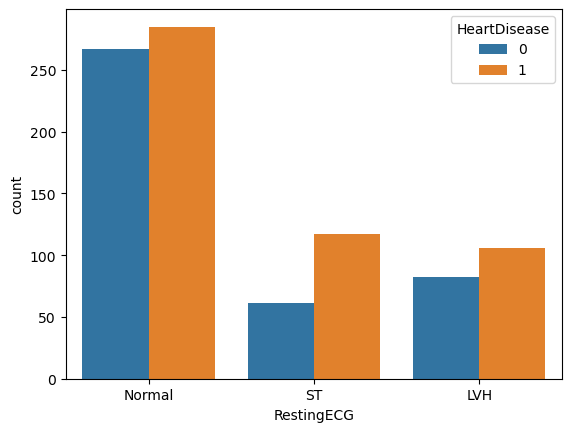

In [265]:
sns.countplot(x='RestingECG',hue = 'HeartDisease',data = df)

As per the graph persons who has RestingECG as Normal those are having more no of heart disease.

<Axes: xlabel='ExerciseAngina', ylabel='count'>

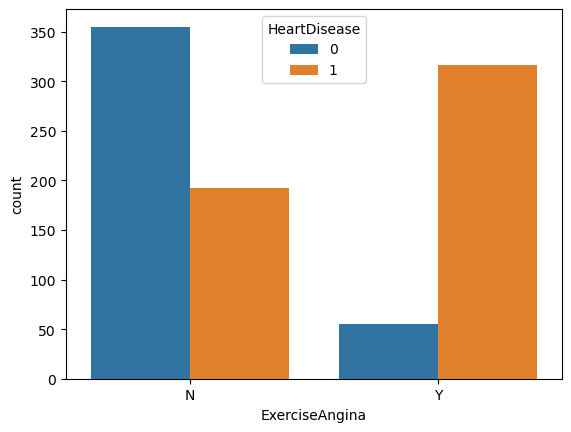

In [266]:
sns.countplot(x='ExerciseAngina',hue = 'HeartDisease',data = df)

Here we can see that as per the graph the persons who suffering from exercise angina has more number of heartdisease patients.

<Axes: xlabel='ST_Slope', ylabel='count'>

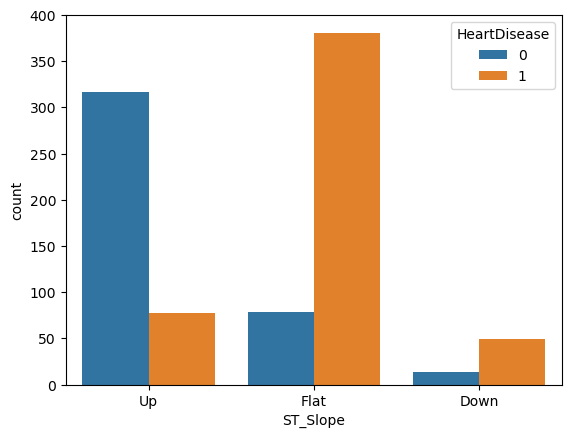

In [267]:
sns.countplot(x='ST_Slope',hue='HeartDisease',data=df)

Here we can see that as per the graph the peoples who has Slope of the peak exercise ST segment as flat are having most no of heart disease 

<Axes: xlabel='HeartDisease', ylabel='count'>

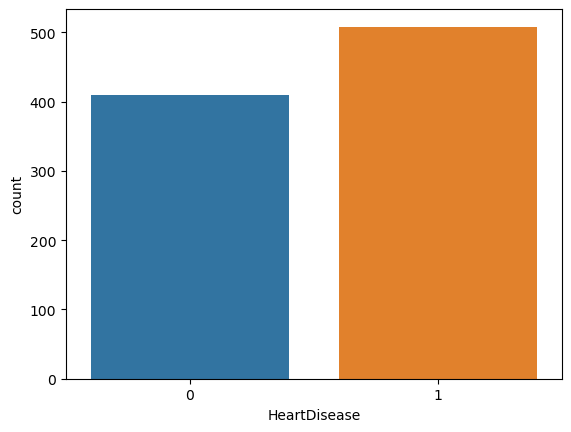

In [268]:
sns.countplot(x='HeartDisease',data=df)

Here we have records of 0 = 410 & 1 = 508 so our dependent variable is balanced.

In [269]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

# Outliers Detection

<Axes: >

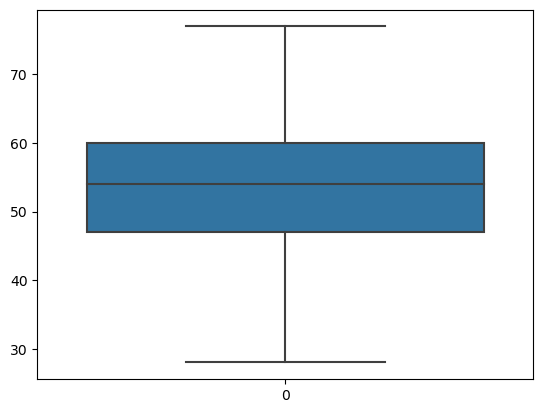

In [270]:
sns.boxplot(df['Age'])   

<Axes: >

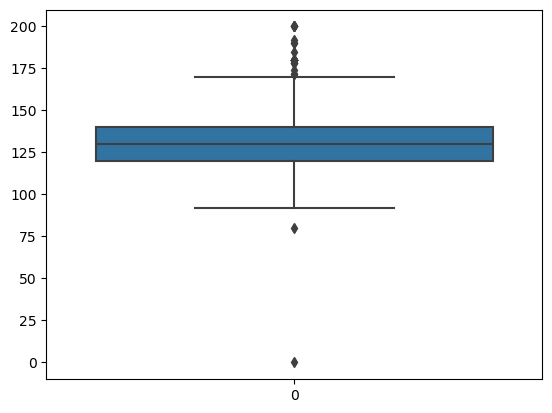

In [271]:
sns.boxplot(df['RestingBP'])

In [272]:
upper_limit = df['RestingBP'].mean() + 3*df['RestingBP'].std()
lower_limit = df['RestingBP'].mean() - 3*df['RestingBP'].std()
print('Upper_Limit',upper_limit)
print('Lower_Limit',lower_limit)

Upper_Limit 187.93897652094347
Lower_Limit 76.85405180149661


In [273]:
 df.loc[(df['RestingBP'] > upper_limit) | (df['RestingBP'] < lower_limit)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [274]:
## capping - Changing the outlier values to upper limit or lower limit values
df['RestingBP'] = np.where(
    df['RestingBP'] > upper_limit,
    upper_limit,
    np.where(
        df['RestingBP'] < lower_limit,
        lower_limit,
        df['RestingBP']
    )
)

<Axes: >

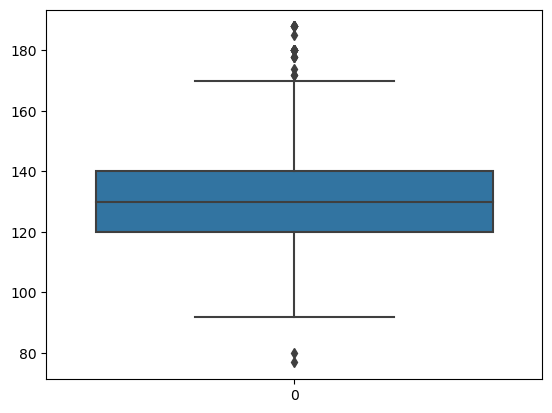

In [275]:
sns.boxplot(df['RestingBP'])

In [276]:
 df.loc[(df['RestingBP'] > upper_limit) | (df['RestingBP'] < lower_limit)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


<Axes: >

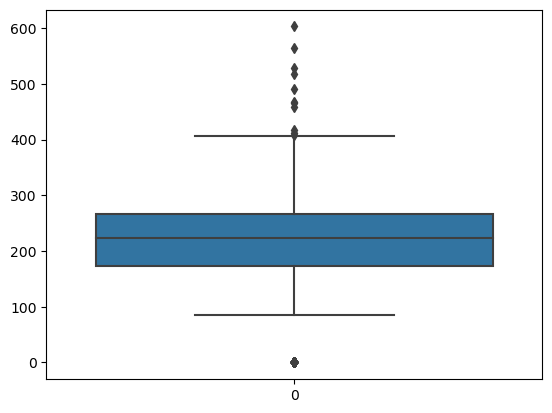

In [277]:
sns.boxplot(df['Cholesterol'])

In [278]:
upper_limit = df['Cholesterol'].mean() + 3*df['Cholesterol'].std()
lower_limit = df['Cholesterol'].mean() - 3*df['Cholesterol'].std()
print('Upper_Limit',upper_limit)
print('Lower_Limit',lower_limit)

Upper_Limit 526.9519979267626
Lower_Limit -129.35286938645763


In [279]:
 df.loc[(df['Cholesterol'] > upper_limit) | (df['Cholesterol'] < lower_limit)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118.0,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130.0,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115.0,564,0,LVH,160,N,1.6,Flat,0


In [280]:
## capping - Changing the outlier values to upper limit or lower limit values
df['Cholesterol'] = np.where(
    df['Cholesterol'] > upper_limit,
    upper_limit,
    np.where(
        df['Cholesterol'] < lower_limit,
        lower_limit,
        df['Cholesterol']
    )
)

<Axes: >

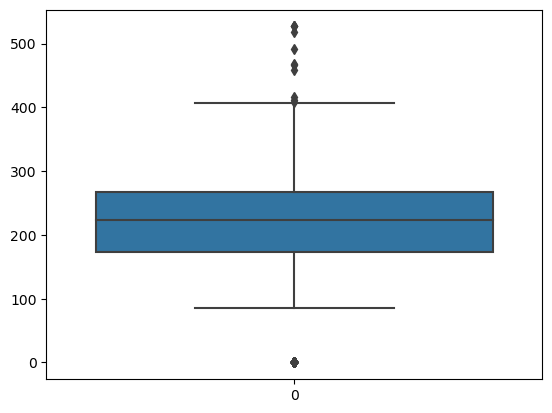

In [281]:
sns.boxplot(df['Cholesterol'])

In [282]:
 df.loc[(df['Cholesterol'] > upper_limit) | (df['Cholesterol'] < lower_limit)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


<Axes: >

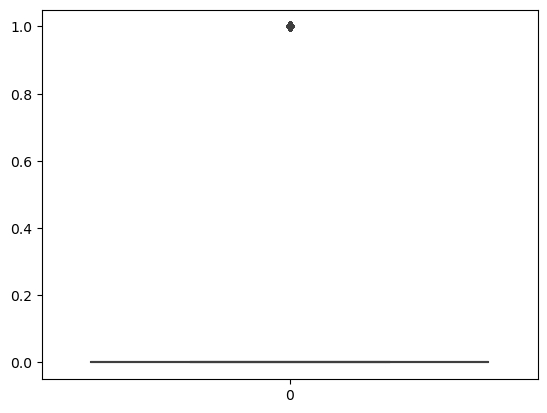

In [283]:
sns.boxplot(df['FastingBS'])

<Axes: >

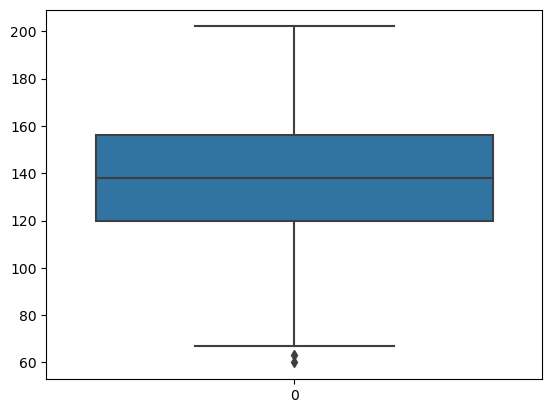

In [284]:
sns.boxplot(df['MaxHR'])

In [285]:
upper_limit = df['MaxHR'].mean() + 3*df['MaxHR'].std()
lower_limit = df['MaxHR'].mean() - 3*df['MaxHR'].std()
print('Upper_Limit',upper_limit)
print('Lower_Limit',lower_limit)

Upper_Limit 213.19037060647202
Lower_Limit 60.42836577697024


In [286]:
 df.loc[(df['MaxHR'] > upper_limit) | (df['MaxHR'] < lower_limit)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
390,51,M,ASY,140.0,0.0,0,Normal,60,N,0.0,Flat,1


In [287]:
## capping - Changing the outlier values to upper limit or lower limit values
df['MaxHR'] = np.where(
    df['MaxHR'] > upper_limit,
    upper_limit,
    np.where(
        df['MaxHR'] < lower_limit,
        lower_limit,
        df['MaxHR']
    )
)

<Axes: >

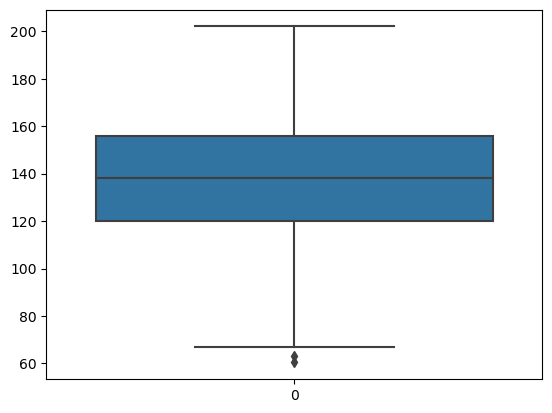

In [288]:
sns.boxplot(df['MaxHR'])

In [289]:
 df.loc[(df['MaxHR'] > upper_limit) | (df['MaxHR'] < lower_limit)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


<Axes: >

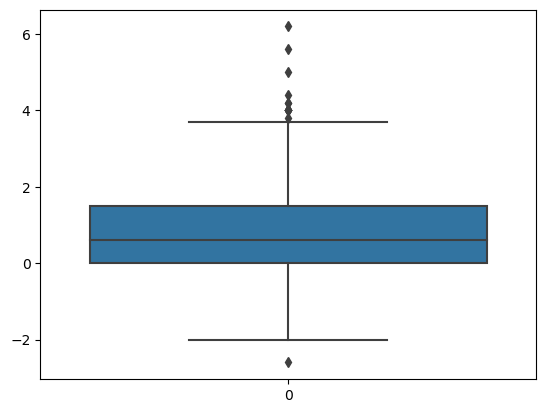

In [290]:
sns.boxplot(df['Oldpeak'])

In [291]:
upper_limit = df['Oldpeak'].mean() + 3*df['Oldpeak'].std()
lower_limit = df['Oldpeak'].mean() - 3*df['Oldpeak'].std()
print('Upper_Limit',upper_limit)
print('Lower_Limit',lower_limit)

Upper_Limit 4.087074287570628
Lower_Limit -2.312346618725312


In [292]:
 df.loc[(df['Oldpeak'] > upper_limit) | (df['Oldpeak'] < lower_limit)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140.0,231.0,0,ST,140.0,Y,5.0,Flat,1
324,46,M,ASY,100.0,0.0,1,ST,133.0,N,-2.6,Flat,1
702,59,M,TA,178.0,270.0,0,LVH,145.0,N,4.2,Down,0
771,55,M,ASY,140.0,217.0,0,Normal,111.0,Y,5.6,Down,1
791,51,M,ASY,140.0,298.0,0,Normal,122.0,Y,4.2,Flat,1
850,62,F,ASY,160.0,164.0,0,LVH,145.0,N,6.2,Down,1
900,58,M,ASY,114.0,318.0,0,ST,140.0,N,4.4,Down,1


In [293]:
## capping - Changing the outlier values to upper limit or lower limit values
df['Oldpeak'] = np.where(
    df['Oldpeak'] > upper_limit,
    upper_limit,
    np.where(
        df['Oldpeak'] < lower_limit,
        lower_limit,
        df['Oldpeak']
    )
)

<Axes: >

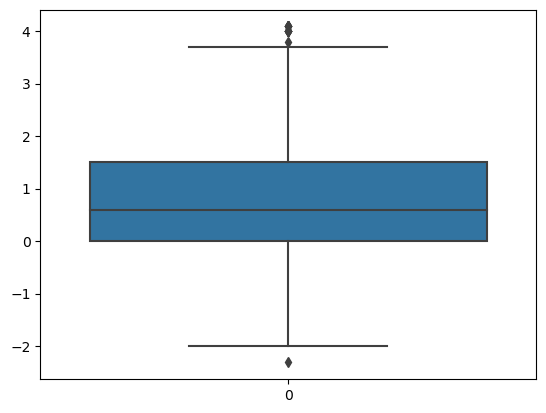

In [294]:
sns.boxplot(df['Oldpeak'])

In [295]:
 df.loc[(df['Oldpeak'] > upper_limit) | (df['Oldpeak'] < lower_limit)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


**DATA PREPROCESSING**

In [296]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132.0,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141.0,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115.0,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174.0,N,0.0,Flat,1


In [297]:
cat_fea = df[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']]

In [298]:
dummies = pd.get_dummies(data=cat_fea,drop_first=True)

In [299]:
## concattinating dummy feature to main DataFrame by column
df=pd.concat([df,dummies],axis=1)

In [300]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,...,0,1,1,0,0,1,0,0,0,1
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,...,1,0,0,1,0,1,0,0,1,0
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,...,0,1,1,0,0,0,1,0,0,1
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,...,1,0,0,0,0,1,0,1,1,0
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132.0,N,1.2,...,1,1,0,0,1,1,0,0,1,0
914,68,M,ASY,144.0,193.0,1,Normal,141.0,N,3.4,...,1,1,0,0,0,1,0,0,1,0
915,57,M,ASY,130.0,131.0,0,Normal,115.0,Y,1.2,...,1,1,0,0,0,1,0,1,1,0
916,57,F,ATA,130.0,236.0,0,LVH,174.0,N,0.0,...,1,0,1,0,0,0,0,0,1,0


In [301]:
## dropping the feature which contains categorical data
df.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1,inplace=True)

In [302]:
## Here We can see our data is ready to build model now.
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172.0,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160.0,180.0,0,156.0,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,0,98.0,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138.0,214.0,0,108.0,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150.0,195.0,0,122.0,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132.0,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144.0,193.0,1,141.0,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130.0,131.0,0,115.0,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130.0,236.0,0,174.0,0.0,1,0,1,0,0,0,0,0,1,0


**Drawing heatmap to check correlation**

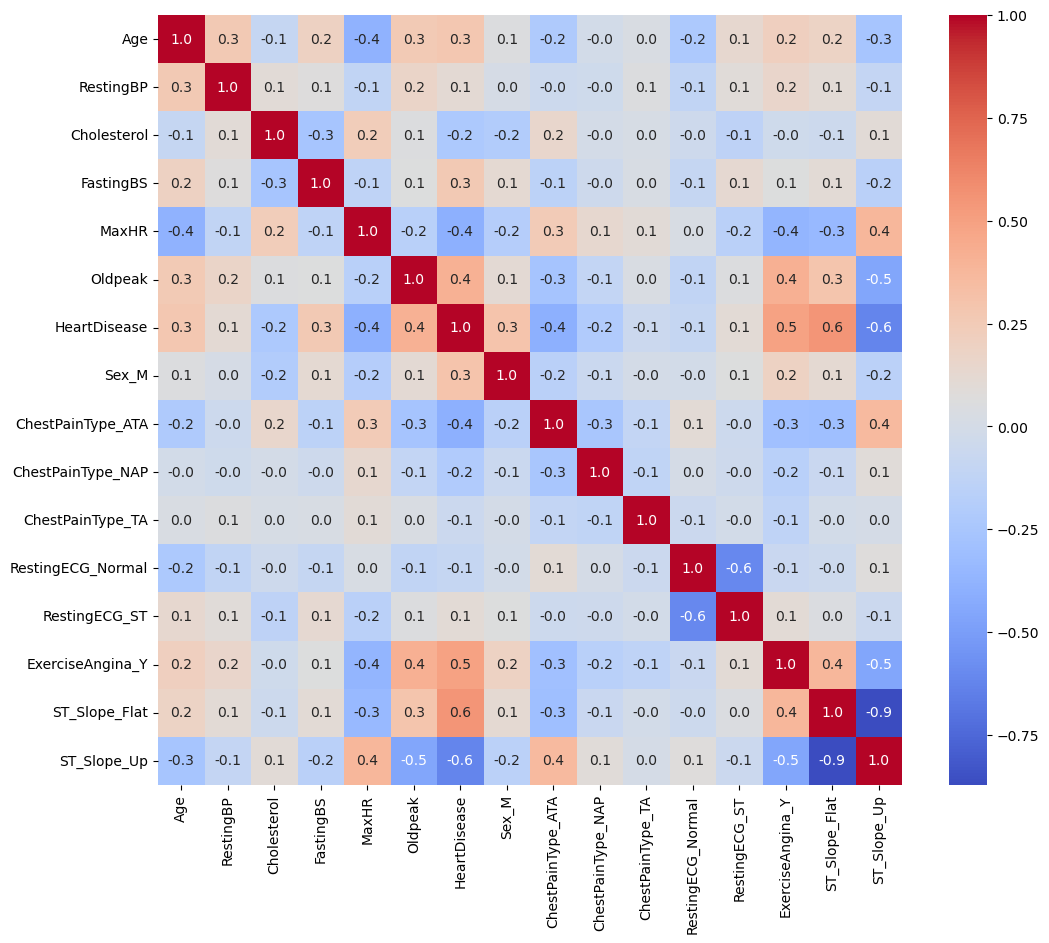

In [303]:
correlation=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation,annot=True,fmt=".1f",cmap="coolwarm")
plt.show()

In [304]:
import xgboost as xgb
df_imputed = df.copy()
train = df_imputed[df_imputed["Cholesterol"] != 0]
test = df_imputed[df_imputed["Cholesterol"] == 0]
X_train = train.drop('Cholesterol', axis=1)
y_train = train['Cholesterol']
X_test = test.drop('Cholesterol', axis=1)
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=69)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
df_imputed.loc[df_imputed["Cholesterol"] == 0, "Cholesterol"] = y_pred

<Axes: xlabel='Cholesterol', ylabel='Density'>

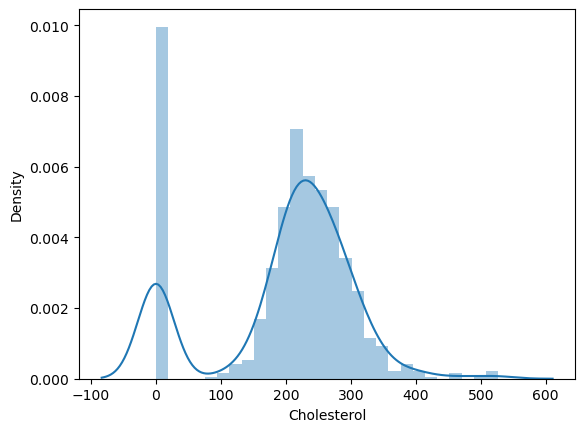

In [305]:
sns.distplot(df['Cholesterol'])

<Axes: xlabel='Cholesterol', ylabel='Density'>

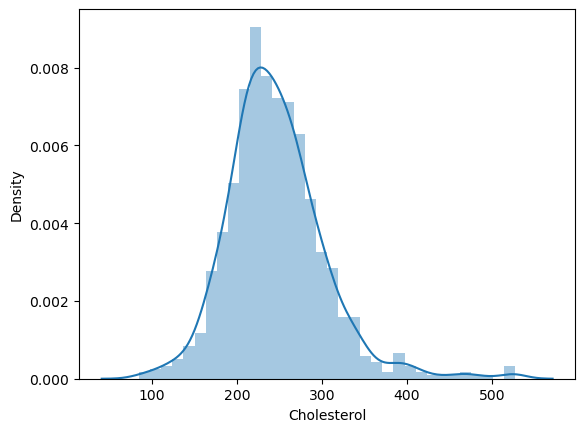

In [306]:
sns.distplot(df_imputed['Cholesterol'])

In [307]:
df_imputed

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172.0,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160.0,180.0,0,156.0,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,0,98.0,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138.0,214.0,0,108.0,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150.0,195.0,0,122.0,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132.0,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144.0,193.0,1,141.0,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130.0,131.0,0,115.0,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130.0,236.0,0,174.0,0.0,1,0,1,0,0,0,0,0,1,0


**MODEL BUILDING**


CHECKING FOR IMBALANCE DATA

In [308]:
df_imputed["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

NORMALLY WE CONSIDER 1:2 RATIO AS ACCEPTABLE FOR BINARY VALUE COUNT. HERE THAT CONDITION LOOKS SATISFACTORY. SO , WE CAN SAY THAT OUR DATA IS NOT IMBALANCED.

TRAIN TEST SPLIT

In [309]:
from sklearn.model_selection import train_test_split
X=df_imputed.drop(["HeartDisease"] , axis=1)
Y=df["HeartDisease"]

In [310]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y ,test_size=0.2 ,random_state=100)

In [311]:
print("X_train shape :",X_train.shape)
print( "X_test shape :",X_test.shape)

X_train shape : (734, 15)
X_test shape : (184, 15)


Logistic Regression Algorithm(STATISTICAL APPROAH)

In [312]:
import statsmodels.api as sm
X=sm.add_constant(df)

In [313]:
from sklearn.linear_model import LogisticRegression
Stats_model=sm.Logit(Y_train,X_train)
Statistical_model=Stats_model.fit()

Optimization terminated successfully.
         Current function value: 0.329216
         Iterations 7


In [314]:
Statistical_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.522      
Dependent Variable: HeartDisease     AIC:              513.2885   
Date:               2023-05-11 03:13 BIC:              582.2661   
No. Observations:   734              Log-Likelihood:   -241.64    
Df Model:           14               LL-Null:          -505.23    
Df Residuals:       719              LLR p-value:      1.5960e-103
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Age                 0.0028   0.0121  0.2287 0.8191 -0.0209  0.0264
RestingBP           0.0001   0.0062  0.0124 0.9901 -0.0121  0.0122
Cholesterol         0.0018   0.0019  0.9392 0.3477 -0.0020  0.0056
FastingBS           1.2455   0.2886  4.3159 0.0000  0.6799  1.8111
MaxHR              -0.0119   0.0042 -2.8082 0.0050 -0.0202 -0.0036
Oldpeak             0.3527   0.1305  2.7019 0.0069  0.0968  0.6085
Sex_M               1.3917   0.3025  4.6005 0.0000  0.7988  1.9846
ChestPainType_ATA  -2.0188   0.3737 -5.4025 0.0000 -2.7512 -1.2864
ChestPainType_NAP  -1.4461   0.2902 -4.9832 0.0000 -2.0149 -0.8773
ChestPainType_TA   -1.6278   0.4575 -3.5577 0.0004 -2.5246 -0.7310
RestingECG_Normal  -0.0145   0.2842 -0.0509 0.9594 -0.5715  0.5425
RestingECG_ST       0.1910   0.3763  0.5075 0.6118 -0.5465  0.9284
ExerciseAngina_Y    0.7819   0.2762  2.8315 0.0046  0.2407  1.3232
ST_Slope_Flat       1.1555   0.4590  2.5176 0.0118  0.2560  2.0551
ST_Slope_Up        -1.2129   0.4829 -2.5115 0.0120 -2.1595 -0.2664
==================================================================

"""

In [315]:
df.nunique()

Age                   50
RestingBP             65
Cholesterol          220
FastingBS              2
MaxHR                119
Oldpeak               49
HeartDisease           2
Sex_M                  2
ChestPainType_ATA      2
ChestPainType_NAP      2
ChestPainType_TA       2
RestingECG_Normal      2
RestingECG_ST          2
ExerciseAngina_Y       2
ST_Slope_Flat          2
ST_Slope_Up            2
dtype: int64

Logistic Regression Algorithm(ML APPROAH).

In [316]:
Logitsic_model=LogisticRegression()

In [317]:
Logitsic_model.fit(X_train,Y_train)

LogisticRegression()

In [318]:
Logitsic_model_pred=Logitsic_model.predict(X_test)

In [319]:
print("Accuracy_score of Logistic Regression model on Test Data:",accuracy_score(Y_test,Logitsic_model_pred))

Accuracy_score of Logistic Regression model on Test Data: 0.8858695652173914


In [320]:
Logitsic_model_train_pred=Logitsic_model.predict(X_train)

In [321]:
print("Accuracy_score of Logistic Regression model on Train Data:",accuracy_score(Y_train,Logitsic_model_train_pred))

Accuracy_score of Logistic Regression model on Train Data: 0.8651226158038147


Here we can see there's not much of difference in training and testing data accurcy so we can say that model is not overfitting on data.

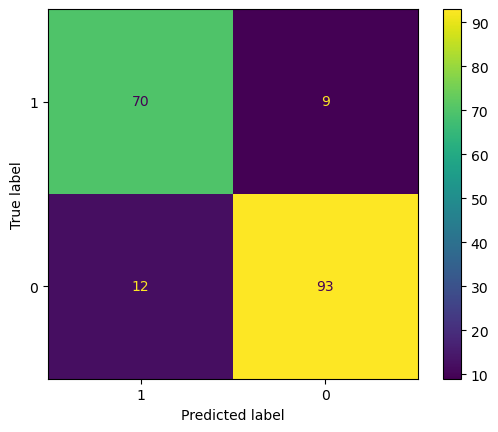

In [322]:
## Drawing Confusion matrix for logistic Regression Model.
from sklearn import metrics
confusion_matrix_Logistic_model=metrics.confusion_matrix(Y_test,Logitsic_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_Logistic_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

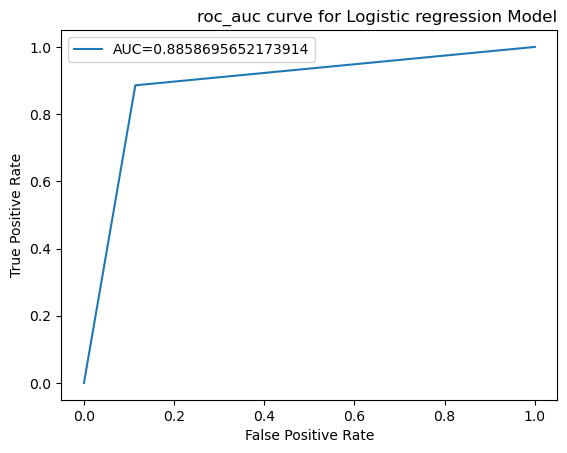

In [323]:
## plotting roc_auc_curve for Logistic Regression Model
fpr,tpr, _= metrics.roc_curve(Y_test,Logitsic_model_pred)
auc_logistic_model=metrics.roc_auc_score(Y_test,Logitsic_model_pred)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC="+str(accuracy_score(Y_test,Logitsic_model_pred))])
plt.title("roc_auc curve for Logistic regression Model" , loc="right")
plt.show()

In [324]:
## classification report for Logistic Regression Model.
print(classification_report(Y_test,Logitsic_model_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        79
           1       0.91      0.89      0.90       105

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



Random Forest Algorithm:

In [325]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier()

In [326]:
RF_model.fit(X_train,Y_train)

RandomForestClassifier()

In [327]:
RF_model_pred=RF_model.predict(X_test)

In [328]:
print("Accuracy_score of Random Forest model on Test Data:",accuracy_score(Y_test,RF_model_pred))

Accuracy_score of Random Forest model on Test Data: 0.8586956521739131


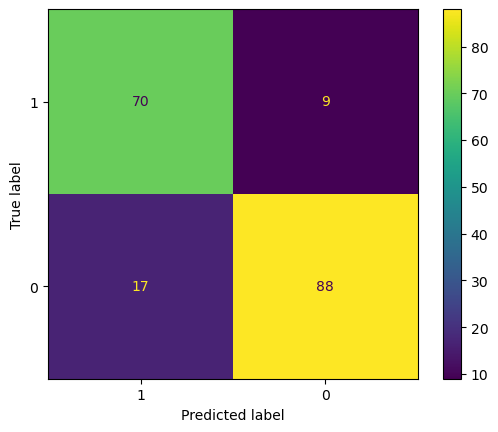

In [329]:
## Drawing Confusion matrix for Random Forest Model.
from sklearn import metrics
confusion_matrix_RF_model=metrics.confusion_matrix(Y_test,RF_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_RF_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

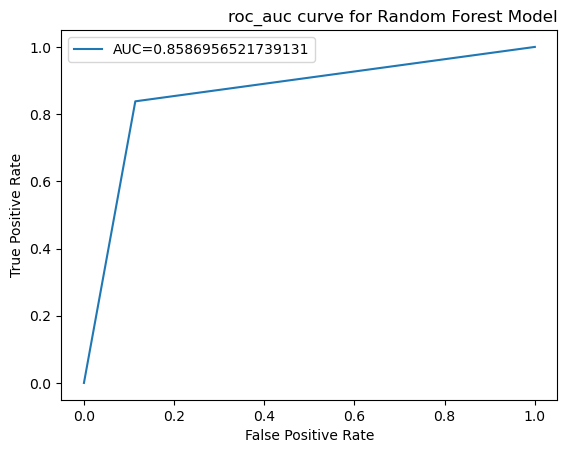

In [330]:
 ## plotting roc_auc_curve for Random Forest Model
fpr,tpr, _= metrics.roc_curve(Y_test,RF_model_pred)
auc_RF_model=metrics.roc_auc_score(Y_test,RF_model_pred)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC="+str(accuracy_score(Y_test,RF_model_pred))])
plt.title("roc_auc curve for Random Forest Model" , loc="right")
plt.show()

In [331]:
## classification report for Random Forest Model.
print(classification_report(Y_test,RF_model_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        79
           1       0.91      0.84      0.87       105

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



Decision Tree Algorithm

In [332]:
from sklearn.tree import DecisionTreeClassifier
DT_model=DecisionTreeClassifier()

In [333]:
DT_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [334]:
DT_model_pred=DT_model.predict(X_test)

In [335]:
print("Accuracy_score of Decision Tree model on Test Data:",accuracy_score(Y_test,DT_model_pred))

Accuracy_score of Decision Tree model on Test Data: 0.75


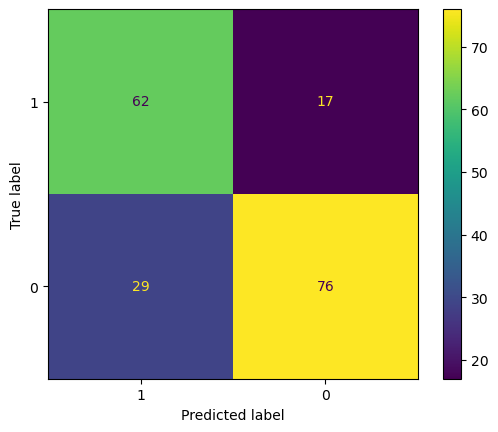

In [336]:
## Drawing Confusion matrix for Decision Tree Model.
from sklearn import metrics
confusion_matrix_DT_model=metrics.confusion_matrix(Y_test,DT_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_DT_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

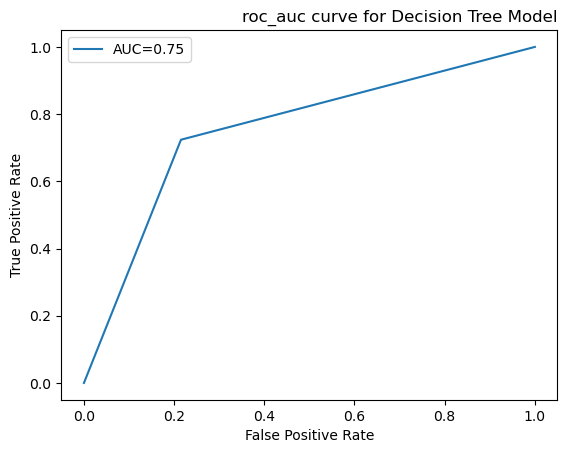

In [337]:
## plotting roc_auc_curve for  Decision Tree Model
fpr,tpr, _= metrics.roc_curve(Y_test,DT_model_pred)
auc_DT_model=metrics.roc_auc_score(Y_test,DT_model_pred)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC="+str(accuracy_score(Y_test,DT_model_pred))])
plt.title("roc_auc curve for Decision Tree Model" , loc="right")
plt.show()

In [338]:
## classification report for Decision Tree Model.
print(classification_report(Y_test,DT_model_pred))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73        79
           1       0.82      0.72      0.77       105

    accuracy                           0.75       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.76      0.75      0.75       184



AdaBoost Algorithm

In [339]:
from sklearn.ensemble import AdaBoostClassifier
ABC_model=AdaBoostClassifier()

In [340]:
ABC_model.fit(X_train,Y_train)

AdaBoostClassifier()

In [341]:
ABC_model_pred=ABC_model.predict(X_test)

In [342]:
print("Accuracy_score of AdaBoost model on Test Data:",accuracy_score(Y_test,ABC_model_pred))

Accuracy_score of AdaBoost model on Test Data: 0.8478260869565217


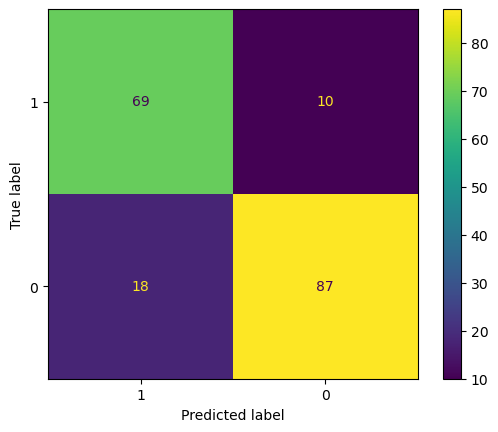

In [343]:
## Drawing Confusion matrix for Ada Boost Model.
from sklearn import metrics
confusion_matrix_ABC_model=metrics.confusion_matrix(Y_test,ABC_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_ABC_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

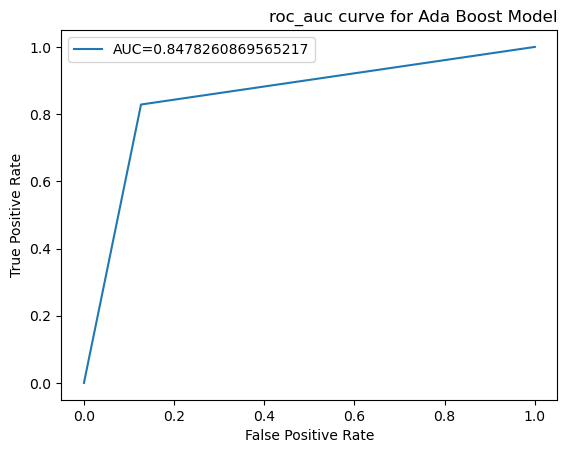

In [344]:
## plotting roc_auc_curve for Ada Boost Model
fpr,tpr, _= metrics.roc_curve(Y_test,ABC_model_pred)
auc_ABC_model=metrics.roc_auc_score(Y_test,ABC_model_pred)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC="+str(accuracy_score(Y_test,ABC_model_pred))])
plt.title("roc_auc curve for Ada Boost Model" , loc="right")
plt.show()

In [345]:
## classification report for Ada Boost Model.
print(classification_report(Y_test,ABC_model_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        79
           1       0.90      0.83      0.86       105

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



SVC Algorithm

In [346]:
from sklearn.svm import SVC
SVC_model=SVC()

In [347]:
SVC_model.fit(X_train,Y_train)

SVC()

In [348]:
SVC_model_pred=SVC_model.predict(X_test)

In [349]:
print("Accuracy_score of SVC model on Test Data:",accuracy_score(Y_test,SVC_model_pred))

Accuracy_score of SVC model on Test Data: 0.6793478260869565


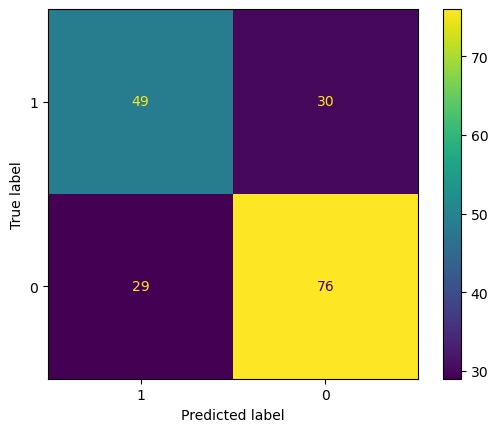

In [350]:
## Drawing Confusion matrix for SVC Model.
from sklearn import metrics
confusion_matrix_SVC_model=metrics.confusion_matrix(Y_test,SVC_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_SVC_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

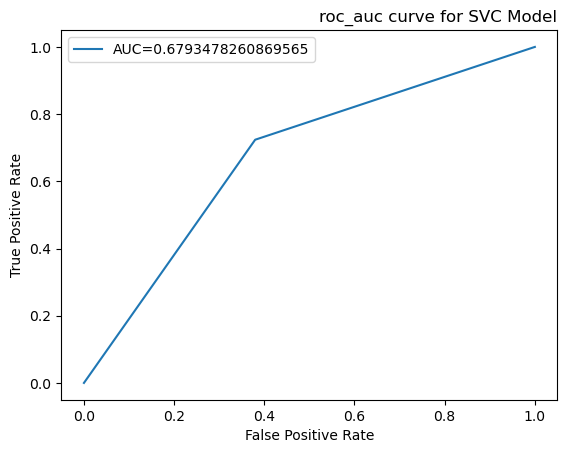

In [351]:
## plotting roc_auc_curve for Ada Boost Model
fpr,tpr, _= metrics.roc_curve(Y_test,SVC_model_pred)
auc_SVC_model=metrics.roc_auc_score(Y_test,SVC_model_pred)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC="+str(accuracy_score(Y_test,SVC_model_pred))])
plt.title("roc_auc curve for SVC Model" , loc="right")
plt.show()

In [352]:
## classification report for SVC Model.
print(classification_report(Y_test,SVC_model_pred))

              precision    recall  f1-score   support

           0       0.63      0.62      0.62        79
           1       0.72      0.72      0.72       105

    accuracy                           0.68       184
   macro avg       0.67      0.67      0.67       184
weighted avg       0.68      0.68      0.68       184



KNN Algorithm

In [353]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()

In [354]:
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [355]:
KNN_model_pred=KNN_model.predict(X_test)

In [356]:
print("Accuracy_score of SVC model on Test Data:",accuracy_score(Y_test,KNN_model_pred))

Accuracy_score of SVC model on Test Data: 0.6358695652173914


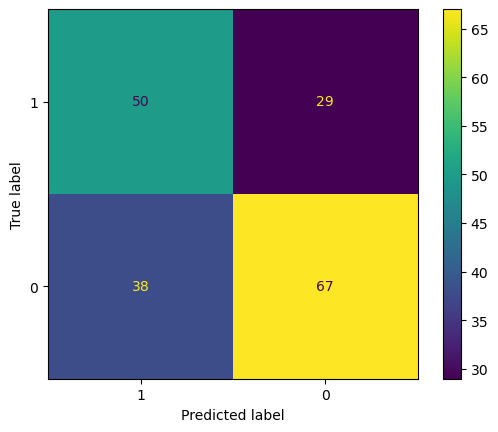

In [357]:
## Drawing Confusion matrix for KNN Model.
from sklearn import metrics
confusion_matrix_KNN_model=metrics.confusion_matrix(Y_test,KNN_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_KNN_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

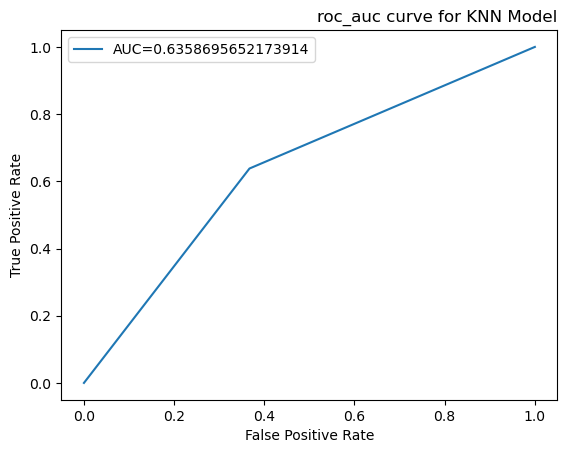

In [358]:
## plotting roc_auc_curve for KNN Model
fpr,tpr, _= metrics.roc_curve(Y_test,KNN_model_pred)
auc_KNN_model=metrics.roc_auc_score(Y_test,KNN_model_pred)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC="+str(accuracy_score(Y_test,KNN_model_pred))])
plt.title("roc_auc curve for KNN Model" , loc="right")
plt.show()

In [359]:
## classification report for KNN Model.
print(classification_report(Y_test,KNN_model_pred))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60        79
           1       0.70      0.64      0.67       105

    accuracy                           0.64       184
   macro avg       0.63      0.64      0.63       184
weighted avg       0.64      0.64      0.64       184



From all the above 6 algorithms Logistic Regression > Random Forest > Ada Boost > Decision Tree > SVC while predicting False Positive.We will work on tuning hyperparameters for this 3 Algorithms to reduced Recall.

FEATURE SELECTION

Feature Selection Using Recursive feature elimination method

In [360]:
X

,const,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,1.0,40,140.0,289.0,0,172.0,0.0,0,1,1,0,0,1,0,0,0,1
1,1.0,49,160.0,180.0,0,156.0,1.0,1,0,0,1,0,1,0,0,1,0
2,1.0,37,130.0,283.0,0,98.0,0.0,0,1,1,0,0,0,1,0,0,1
3,1.0,48,138.0,214.0,0,108.0,1.5,1,0,0,0,0,1,0,1,1,0
4,1.0,54,150.0,195.0,0,122.0,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1.0,45,110.0,264.0,0,132.0,1.2,1,1,0,0,1,1,0,0,1,0
914,1.0,68,144.0,193.0,1,141.0,3.4,1,1,0,0,0,1,0,0,1,0
915,1.0,57,130.0,131.0,0,115.0,1.2,1,1,0,0,0,1,0,1,1,0
916,1.0,57,130.0,236.0,0,174.0,0.0,1,0,1,0,0,0,0,0,1,0


In [361]:
X.drop(["const","HeartDisease"],axis=1,inplace=True) ## dropping unwanted features

In [362]:
##Feature Extraction
RF_model=RandomForestClassifier()
recur_fe = RFE(RF_model,n_features_to_select=11)
Feature = recur_fe.fit(X,Y)
print('Number of Features:%s'%(Feature.n_features_))
print('Selected Features are : %s'% (Feature.support_))
print('Feature ranking is as follows: %s'%(Feature.ranking_))

Number of Features:11
Selected Features are : [ True  True  True  True  True  True  True  True False False False False
  True  True  True]
Feature ranking is as follows: [1 1 1 1 1 1 1 1 2 5 3 4 1 1 1]


In [363]:
## Creating a dataframe to understand What are the important features
select_imp_features =pd.DataFrame({ "Feature" : list(X.columns),
                                   "Ranking" : Feature.ranking_})
select_imp_features.sort_values(by="Ranking")

,Feature,Ranking
0,Age,1
1,RestingBP,1
2,Cholesterol,1
3,FastingBS,1
4,MaxHR,1
5,Oldpeak,1
6,Sex_M,1
7,ChestPainType_ATA,1
12,ExerciseAngina_Y,1
13,ST_Slope_Flat,1


In [364]:
## fitting that 11 important features into a variable 
best_features =Feature.transform(X)

In [365]:
## shape of new df
best_features.shape

(918, 11)

In [366]:
best_features

array([[ 40., 140., 289., ...,   0.,   0.,   1.],
       [ 49., 160., 180., ...,   0.,   1.,   0.],
       [ 37., 130., 283., ...,   0.,   0.,   1.],
       ...,
       [ 57., 130., 131., ...,   1.,   1.,   0.],
       [ 57., 130., 236., ...,   0.,   1.,   0.],
       [ 38., 138., 175., ...,   0.,   0.,   1.]])

Out of 16 Only 11 Features are imp

Building ML model using Important Features

In [367]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(best_features,Y,test_size=0.2,shuffle=True,random_state=100)

In [368]:
print(X_train1.shape)
print(X_test1.shape)

(734, 11)
(184, 11)


Logistic Regression Model After Feature Selection

In [369]:
LRF_model=LogisticRegression()

In [370]:
LRF_model.fit(X_train1,Y_train1)

LogisticRegression()

In [371]:
LRF_model_test_pred=LRF_model.predict(X_test1)

In [372]:
print("Accuracy score for Logistic regression After feature selection on testing data :",accuracy_score(Y_test1,LRF_model_test_pred))

Accuracy score for Logistic regression After feature selection on testing data : 0.8641304347826086


In [373]:
LRF_model_train_pred=LRF_model.predict(X_train1)

In [374]:
print("Accuracy score for Logistic regression After feature selection on training data :",accuracy_score(Y_train1,LRF_model_train_pred))

Accuracy score for Logistic regression After feature selection on training data : 0.8651226158038147


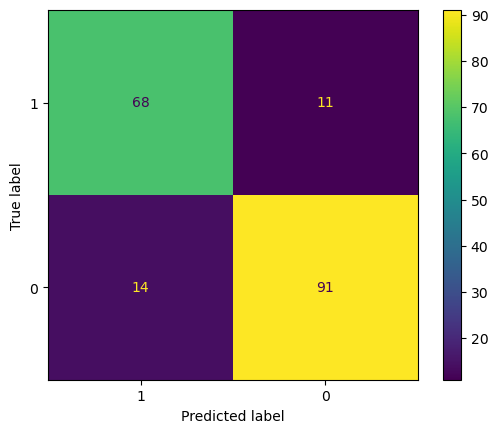

In [375]:
## Drawing Confusion matrix for logistic Regression Model after feature selection.
from sklearn import metrics
confusion_matrix_Logistic_model=metrics.confusion_matrix(Y_test1,LRF_model_test_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_Logistic_model   , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

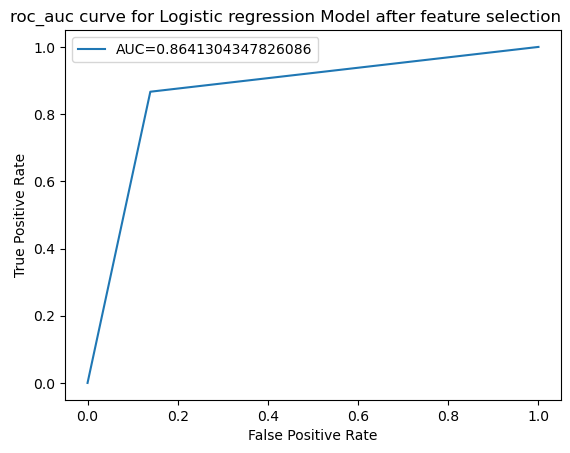

In [376]:
## plotting roc_auc_curve for Logistic Regression Model after feature selection
fpr,tpr, _= metrics.roc_curve(Y_test1,LRF_model_test_pred)
auc_logistic_model=metrics.roc_auc_score(Y_test1,LRF_model_test_pred)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC="+str(accuracy_score(Y_test1,LRF_model_test_pred))])
plt.title("roc_auc curve for Logistic regression Model after feature selection" , loc="right")
plt.show()

Random Forest Model After Feature Selection

In [377]:
RFF_model=RandomForestClassifier()

In [378]:
RFF_model.fit(X_train1,Y_train1)

RandomForestClassifier()

In [379]:
RFF_model_pred=RFF_model.predict(X_test1)

In [380]:
print("Accuracy score for Random Forest Algorithm After feature selection :",accuracy_score(Y_test1,RFF_model_pred))

Accuracy score for Random Forest Algorithm After feature selection : 0.8804347826086957


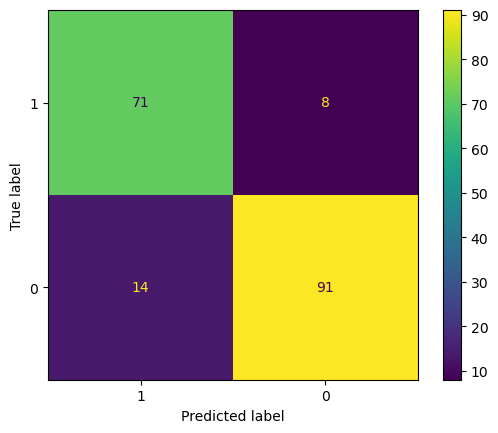

In [381]:
## Drawing Confusion matrix for Random Forest Model.
from sklearn import metrics
confusion_matrix_RF_model=metrics.confusion_matrix(Y_test1,RFF_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_RF_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

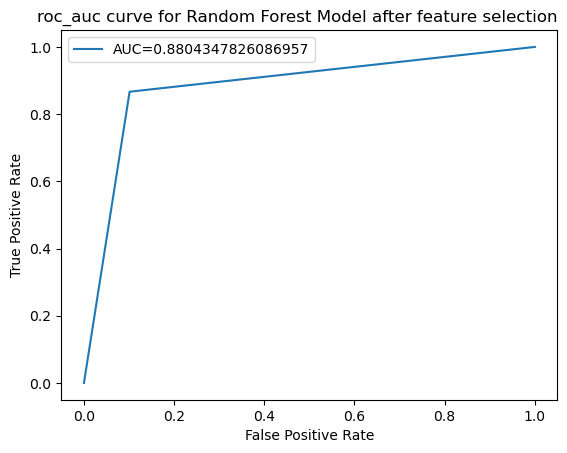

In [382]:
## plotting roc_auc_curve for Random Forest Model
fpr,tpr, _= metrics.roc_curve(Y_test1,RFF_model_pred)
auc_RF_model=metrics.roc_auc_score(Y_test1,RFF_model_pred)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC="+str(accuracy_score(Y_test1,RFF_model_pred))])
plt.title("roc_auc curve for Random Forest Model after feature selection" , loc="right")
plt.show()

Decision Tree Algorithm after feature selection

In [383]:
DTF_model=DecisionTreeClassifier()

In [384]:
DTF_model.fit(X_train1,Y_train1)

DecisionTreeClassifier()

In [385]:
DTF_model_pred=DTF_model.predict(X_test1)

In [386]:
print("Accuracy score for Decision Tree Algorithm After feature selection :",accuracy_score(Y_test1,DTF_model_pred))

Accuracy score for Decision Tree Algorithm After feature selection : 0.7445652173913043


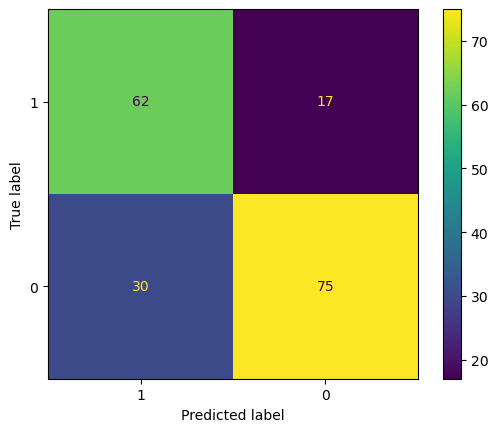

In [387]:
## Drawing Confusion matrix for Decision Tree Model.
from sklearn import metrics
confusion_matrix_DT_model=metrics.confusion_matrix(Y_test1,DTF_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_DT_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

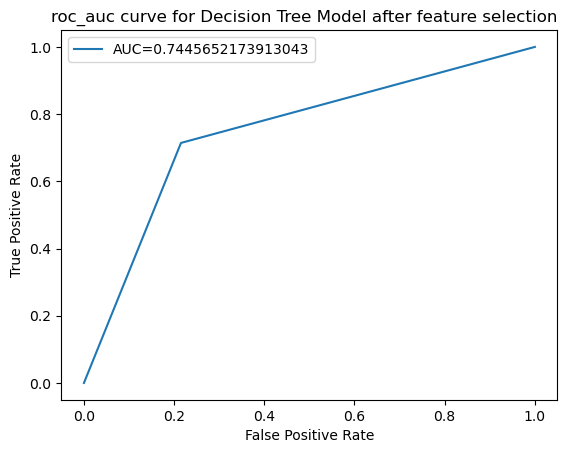

In [388]:
## plotting roc_auc_curve for  Decision Tree Model
fpr,tpr, _= metrics.roc_curve(Y_test1,DTF_model_pred)
auc_DT_model=metrics.roc_auc_score(Y_test1,DTF_model_pred)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC="+str(accuracy_score(Y_test1,DTF_model_pred))])
plt.title("roc_auc curve for Decision Tree Model after feature selection" , loc="right")
plt.show()

AdaBoost Algorithm After Feature Selection

In [389]:
ABFC_model=AdaBoostClassifier()

In [390]:
ABFC_model.fit(X_train1,Y_train1)

AdaBoostClassifier()

In [391]:
ABFC_model_pred=ABFC_model.predict(X_test1)

In [392]:
print("Accuracy score for Adaboost Algorithm After feature selection :",accuracy_score(Y_test1,ABFC_model_pred))

Accuracy score for Adaboost Algorithm After feature selection : 0.8532608695652174


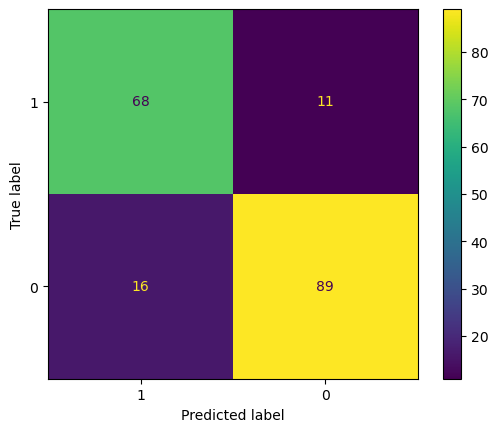

In [393]:
## Drawing Confusion matrix for Ada Boost Model.
from sklearn import metrics
confusion_matrix_ABC_model=metrics.confusion_matrix(Y_test1,ABFC_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_ABC_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

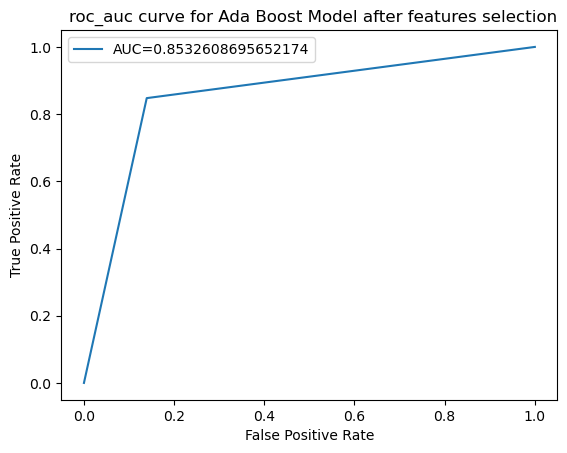

In [394]:
## plotting roc_auc_curve for Ada Boost Model
fpr,tpr, _= metrics.roc_curve(Y_test1,ABFC_model_pred)
auc_ABC_model=metrics.roc_auc_score(Y_test1,ABFC_model_pred)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC="+str(accuracy_score(Y_test1,ABFC_model_pred))])
plt.title("roc_auc curve for Ada Boost Model after features selection" , loc="right")
plt.show()

Support Vector Classifier Algorithm after Feature Selection

In [395]:
svcf_model=SVC()

In [396]:
svcf_model.fit(X_train1,Y_train1)

SVC()

In [397]:
svcf_model_pred=svcf_model.predict(X_test1)

In [398]:
print("Accuracy score for Random Forest Algorithm After feature selection :",accuracy_score(Y_test1,svcf_model_pred))

Accuracy score for Random Forest Algorithm After feature selection : 0.6956521739130435


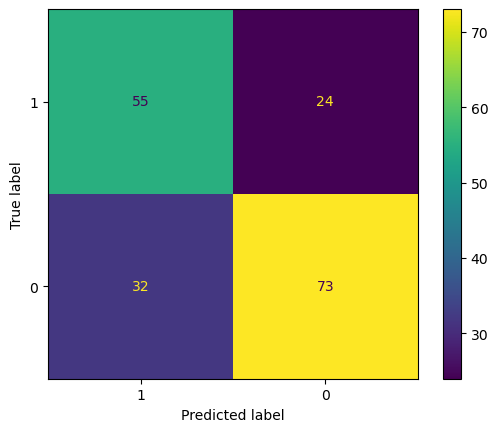

In [399]:
## Drawing Confusion matrix for SVC Model.
from sklearn import metrics
confusion_matrix_SVC_model=metrics.confusion_matrix(Y_test1,svcf_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_SVC_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

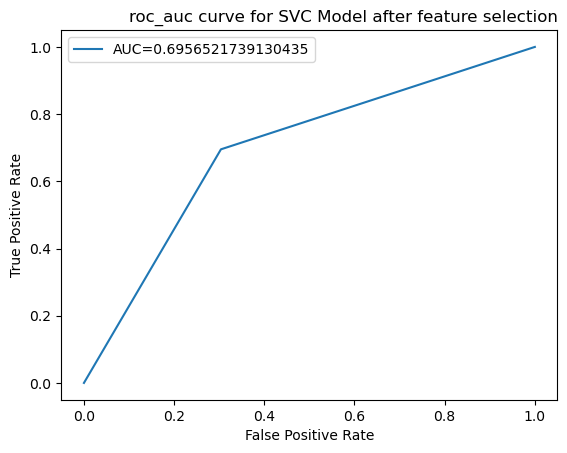

In [400]:
## plotting roc_auc_curve for Ada Boost Model
fpr,tpr, _= metrics.roc_curve(Y_test1,svcf_model_pred)
auc_SVC_model=metrics.roc_auc_score(Y_test1,svcf_model_pred)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC="+str(accuracy_score(Y_test1,svcf_model_pred))])
plt.title("roc_auc curve for SVC Model after feature selection" , loc="right")
plt.show()

KNN Algorithm after Feature Selection

In [401]:
KNNF_model=KNeighborsClassifier()

In [402]:
KNNF_model.fit(X_train1,Y_train1)

KNeighborsClassifier()

In [403]:
KNNF_model_pred=KNNF_model.predict(X_test1)

In [404]:
print("Accuracy score for KNN Algorithm After feature selection :",accuracy_score(Y_test1,KNNF_model_pred))

Accuracy score for KNN Algorithm After feature selection : 0.6902173913043478


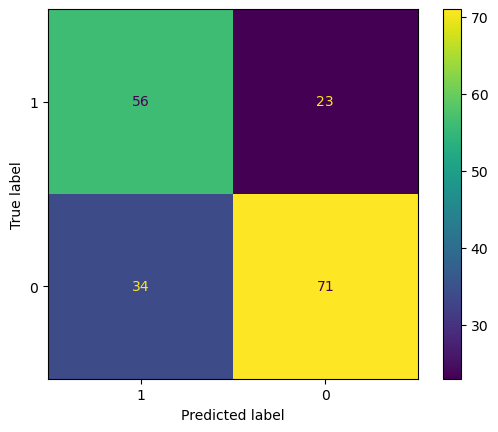

In [405]:
## Drawing Confusion matrix for KNN Model.
from sklearn import metrics
confusion_matrix_KNN_model=metrics.confusion_matrix(Y_test1,KNNF_model_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_KNN_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

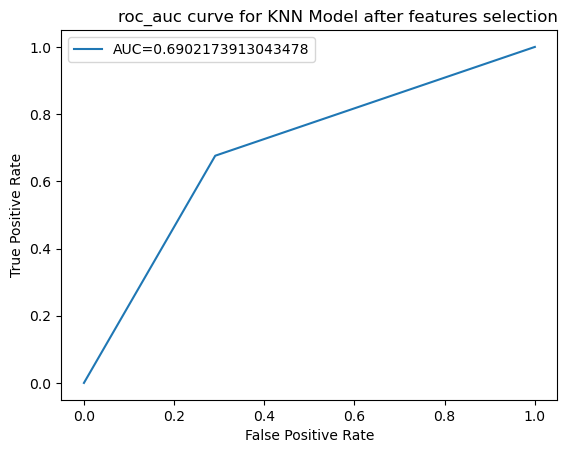

In [406]:
## plotting roc_auc_curve for KNN Model
fpr,tpr, _= metrics.roc_curve(Y_test1,KNNF_model_pred)
auc_KNN_model=metrics.roc_auc_score(Y_test1,KNNF_model_pred)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC="+str(accuracy_score(Y_test1,KNNF_model_pred))])
plt.title("roc_auc curve for KNN Model after features selection" , loc="right")
plt.show()

# HYPERPARAMETER TUNING AND IMPROVING ACCURACY

## Hyperparameter Tunning for Logistic Regression

In [407]:
## Logistic regression does not really have any critical hyperparameters to tune yet we are doing it to see the change in output

In [408]:
parameters_for_logistic_regression={
    "penalty" : ["l1" ,"l2" , "none" , "elasticnet"],
    "solver" : ["liblinear","sag","saga",'newton-cg', 'lbfgs']
    }

In [409]:
classification_for_LRF=GridSearchCV(Logitsic_model,parameters_for_logistic_regression,cv=10)

In [410]:
classification_for_LRF.fit(X,Y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'none', 'elasticnet'],
                         'solver': ['liblinear', 'sag', 'saga', 'newton-cg',
                                    'lbfgs']})

In [411]:
## These are the default paramters that had been used to build previous model so we don't have to build new model based on this params.
classification_for_LRF.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

## Hyperparameter Tuning for Random Forest Classification Algorithm

In [412]:
parameters_for_Random_Forest_classification = {
    "n_estimators" : [60,70,80,90,100,110,120,130,140,150],
    "max_depth" : [8,9,10,11,12,14,16,18,19,20,21,22,23,24,25,26,27,28,29,30],
    "min_samples_split":[1,2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "criterion": ["gini","entropy","log_loss"]
    }

Hyperparameters for Unfeatured Algorithm whose previous accuracy is 0.85

In [413]:
classification_for_rfc=RandomizedSearchCV(RF_model,parameters_for_Random_Forest_classification,cv=10)

In [414]:
classification_for_rfc.fit(X,Y)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [8, 9, 10, 11, 12, 14, 16,
                                                      18, 19, 20, 21, 22, 23,
                                                      24, 25, 26, 27, 28, 29,
                                                      30],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'n_estimators': [60, 70, 80, 90, 100,
                                                         110, 120, 130, 140,
                                                         150]})

In [415]:
print(classification_for_rfc.best_params_)

{'n_estimators': 90, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'log_loss'}


In [416]:
rfc_model_with_pm1=RandomForestClassifier(n_estimators=90 ,
 min_samples_split=2,
 min_samples_leaf=1,
 max_depth=10,
 criterion='log_loss' )

In [417]:
rfc_model_with_pm1.fit(X_train,Y_train)

RandomForestClassifier(criterion='log_loss', max_depth=10, n_estimators=90)

In [418]:
rfc_model_with_pm1_pred=rfc_model_with_pm1.predict(X_test)

In [419]:
print("accuracy score for Random Forest after parameter tunning:",accuracy_score(Y_test,rfc_model_with_pm1_pred))

accuracy score for Random Forest after parameter tunning: 0.8967391304347826


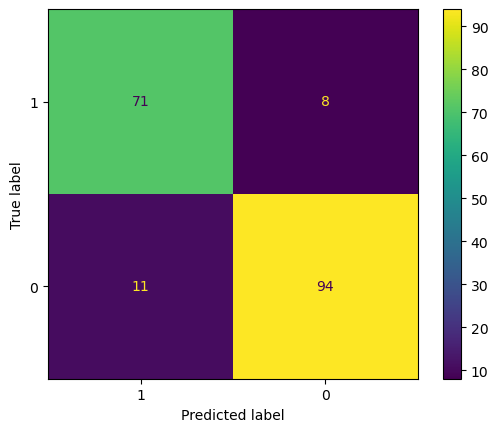

In [420]:
## Drawing Confusion matrix for Random Forest Model after hyperparameter tunning.
from sklearn import metrics
confusion_matrix_RF_model=metrics.confusion_matrix(Y_test,rfc_model_with_pm1_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_RF_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

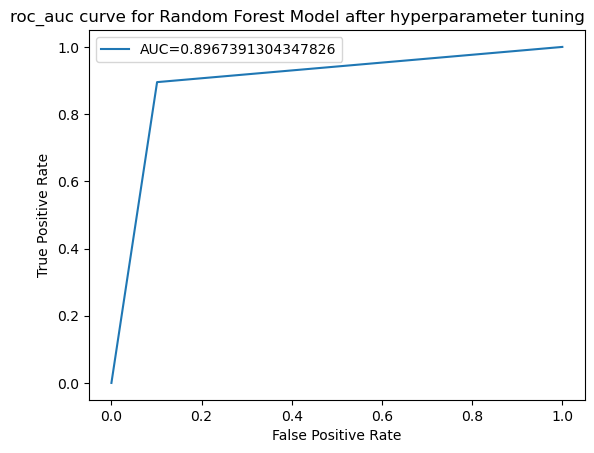

In [421]:
## plotting roc_auc_curve for Random Forest Model after hyperparameter tunning
fpr,tpr, _= metrics.roc_curve(Y_test,rfc_model_with_pm1_pred)
auc_RF_model=metrics.roc_auc_score(Y_test,rfc_model_with_pm1_pred)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC="+str(accuracy_score(Y_test,rfc_model_with_pm1_pred))])
plt.title("roc_auc curve for Random Forest Model after hyperparameter tuning" , loc="right")
plt.show()

Hyperparameters for selected feature Algorithm whose previous accuracy is 0.88

In [422]:
classification_for_rfc2=RandomizedSearchCV(RFF_model,parameters_for_Random_Forest_classification,cv=10)

In [423]:
classification_for_rfc2.fit(best_features,Y)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [8, 9, 10, 11, 12, 14, 16,
                                                      18, 19, 20, 21, 22, 23,
                                                      24, 25, 26, 27, 28, 29,
                                                      30],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'n_estimators': [60, 70, 80, 90, 100,
                                                         110, 120, 130, 140,
                                                         150]})

In [424]:
print(classification_for_rfc2.best_params_)

{'n_estimators': 110, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 24, 'criterion': 'gini'}


In [425]:
rfc_model_with_pm2=RandomForestClassifier(n_estimators= 110,
 min_samples_split=5,
 min_samples_leaf=1,
 max_depth=24,
 criterion='gini' )

In [426]:
rfc_model_with_pm2.fit(X_train1,Y_train1)

RandomForestClassifier(max_depth=24, min_samples_split=5, n_estimators=110)

In [427]:
rfc_model_with_pm2_pred=rfc_model_with_pm2.predict(X_test1)

In [428]:
print("accuracy score for Random Forest after parameter tunning:",accuracy_score(Y_test1,rfc_model_with_pm2_pred))

accuracy score for Random Forest after parameter tunning: 0.8804347826086957


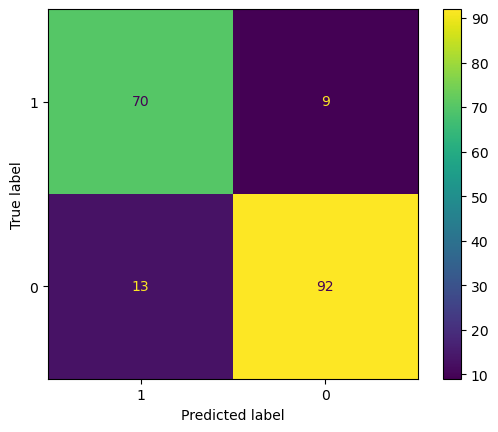

In [429]:
## Drawing Confusion matrix for Random Forest Model with selected 11 features after hyperparameter tunning.
from sklearn import metrics
confusion_matrix_RF_model=metrics.confusion_matrix(Y_test1,rfc_model_with_pm2_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_RF_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

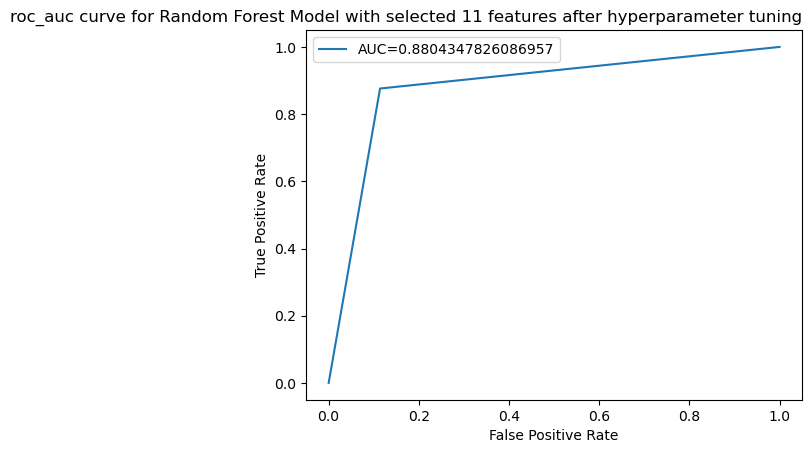

In [430]:
## plotting roc_auc_curve for Random Forest Model with selected 11 features after hyperparameter tunning
fpr,tpr, _= metrics.roc_curve(Y_test,rfc_model_with_pm2_pred)
auc_RF_model=metrics.roc_auc_score(Y_test1,rfc_model_with_pm2_pred)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC="+str(accuracy_score(Y_test1,rfc_model_with_pm2_pred))])
plt.title("roc_auc curve for Random Forest Model with selected 11 features after hyperparameter tuning" , loc="right")
plt.show()

## Hyperparameter Tunning For Decision Tree Algorithm

In [431]:
parameters_for_decision_tree_classification={
    "criterion" : ["gini","entropy","log_loss"],
    "max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
    "min_samples_split": [1,2,3,4,5,6,7,8,9,10],
    "min_samples_leaf" : [1,2,3,4,5,6,7,8,9,10]
}

Hyperparameters for Unfeatured Algorithm whose previous accuracy is 75%

In [432]:
classification_for_dtc=RandomizedSearchCV(DT_model,parameters_for_decision_tree_classification,cv=10)

In [433]:
classification_for_dtc.fit(X,Y)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10]})

In [434]:
classification_for_dtc.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 7,
 'max_depth': 5,
 'criterion': 'gini'}

In [435]:
dtc_model_with_pm1=DecisionTreeClassifier(min_samples_split= 7,min_samples_leaf= 7,max_depth=5,criterion= 'gini')

In [436]:
dtc_model_with_pm1.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, min_samples_split=7)

In [437]:
dtc_model_with_pm1_pred=dtc_model_with_pm1.predict(X_test)

In [438]:
print("accuracy score for Decision Tree after parameter tunning:",accuracy_score(Y_test,dtc_model_with_pm1_pred))

accuracy score for Decision Tree after parameter tunning: 0.8260869565217391


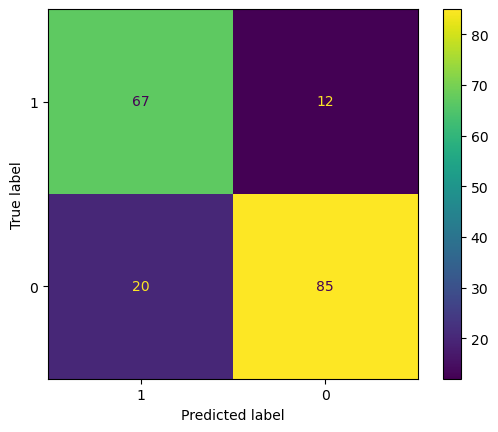

In [439]:
## Drawing Confusion matrix for Decision Tree Model with 15 Features after hyperparameter tunning.
from sklearn import metrics
confusion_matrix_DT_model=metrics.confusion_matrix(Y_test,dtc_model_with_pm1_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_DT_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

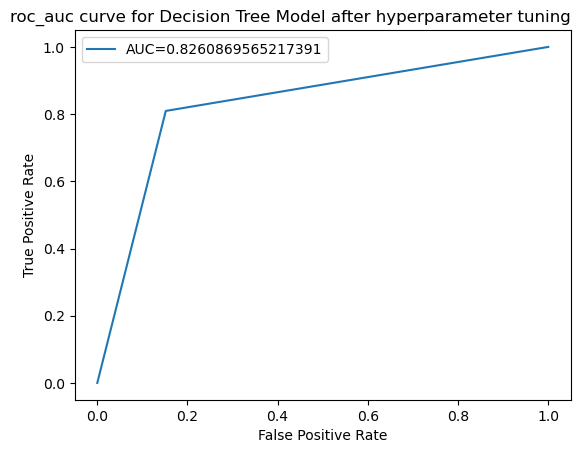

In [440]:
## plotting roc_auc_curve for Decision Tree Model with 15 Features after hyperparameter tunning
fpr,tpr, _= metrics.roc_curve(Y_test,dtc_model_with_pm1_pred)
auc_RF_model=metrics.roc_auc_score(Y_test,dtc_model_with_pm1_pred)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC="+str(accuracy_score(Y_test,dtc_model_with_pm1_pred))])
plt.title("roc_auc curve for Decision Tree Model after hyperparameter tuning" , loc="right")
plt.show()

Hyperparameters for selected feature Algorithm whose previous accuracy is 74%

In [441]:

classification_for_dtc2=RandomizedSearchCV(DTF_model,parameters_for_decision_tree_classification,cv=10)

In [442]:
classification_for_dtc2.fit(best_features,Y)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10]})

In [443]:
print(classification_for_dtc2.best_params_)

{'min_samples_split': 2, 'min_samples_leaf': 8, 'max_depth': 5, 'criterion': 'gini'}


In [444]:
dtc_model_with_pm2=DecisionTreeClassifier(min_samples_split= 2, min_samples_leaf=8, max_depth= 5, criterion= 'gini')

In [445]:
dtc_model_with_pm2.fit(X_train1,Y_train1)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=8)

In [446]:
dtc_model_with_pm2_pred=dtc_model_with_pm2.predict(X_test1)

In [447]:
print("accuracy score for Decision Tree with selected features after parameter tunning:",accuracy_score(Y_test,dtc_model_with_pm2_pred))

accuracy score for Decision Tree with selected features after parameter tunning: 0.8260869565217391


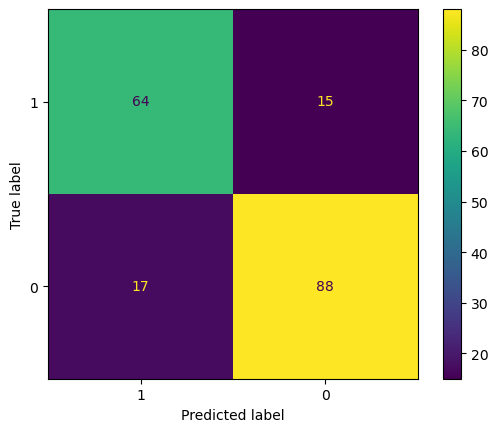

In [448]:
## Drawing Confusion matrix for Decision Tree Model with 11 features after hyperparameter tunning.
from sklearn import metrics
confusion_matrix_DT_model=metrics.confusion_matrix(Y_test1,dtc_model_with_pm2_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_DT_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

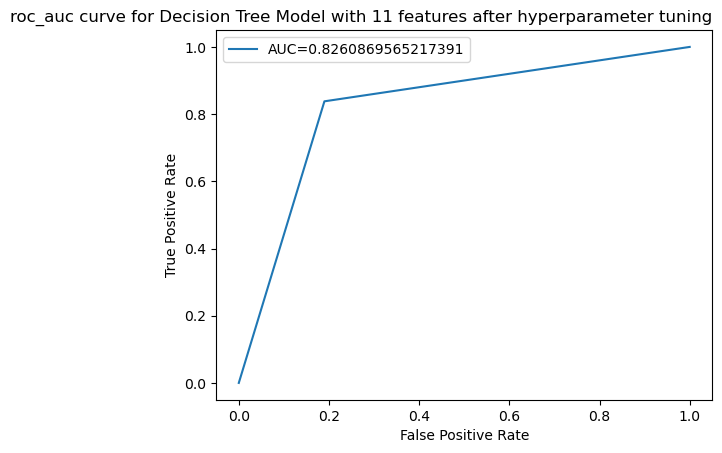

In [449]:
## plotting roc_auc_curve for Decision Tree Model with 11 Features after hyperparameter tunning
fpr,tpr, _= metrics.roc_curve(Y_test,dtc_model_with_pm2_pred)
auc_RF_model=metrics.roc_auc_score(Y_test1,dtc_model_with_pm2_pred)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC="+str(accuracy_score(Y_test1,dtc_model_with_pm2_pred))])
plt.title("roc_auc curve for Decision Tree Model with 11 features after hyperparameter tuning" , loc="right")
plt.show()

## Hyperparameter Tunning for AdaBoost Algorithm

In [451]:
parameters_for_adaboost_classifier={
    "n_estimators" : [20,30,40,50,60,70,80,90,100,110,120,130],
    "learning_rate":[0.0001,0.001,0.01,0.1,1]
}

Hyperparameters for Unfeatured Algorithm whose previous accuracy is 0.84%

In [452]:
classification_for_abc=RandomizedSearchCV(ABC_model,parameters_for_adaboost_classifier,cv=10)

In [453]:
classification_for_abc.fit(X,Y)

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1],
                                        'n_estimators': [20, 30, 40, 50, 60, 70,
                                                         80, 90, 100, 110, 120,
                                                         130]})

In [454]:
print(classification_for_abc.best_params_)

{'n_estimators': 60, 'learning_rate': 0.1}


In [455]:
abc_model_with_pm1=AdaBoostClassifier(n_estimators=60,learning_rate=0.1)

In [456]:
abc_model_with_pm1.fit(X_train,Y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=60)

In [457]:
abc_model_with_pm1_pred=abc_model_with_pm1.predict(X_test)

In [458]:
print("accuracy score for AdaBoost Classifier with 15 features after parameter tunning:",accuracy_score(Y_test,abc_model_with_pm1_pred))

accuracy score for AdaBoost Classifier with 15 features after parameter tunning: 0.8532608695652174


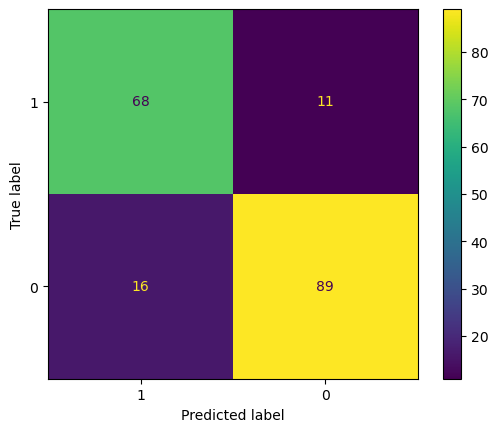

In [459]:
## Drawing Confusion matrix for Ada Boost Classfier Model with 15 features after hyperparameter tunning.
from sklearn import metrics
confusion_matrix_ABC_model=metrics.confusion_matrix(Y_test,abc_model_with_pm1_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_ABC_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

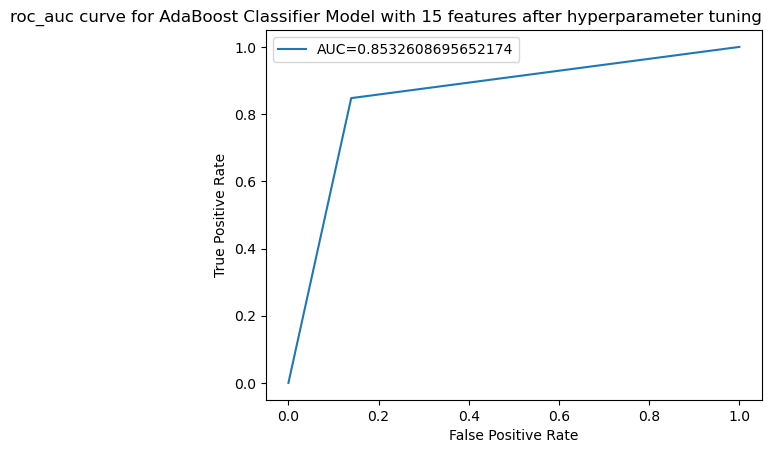

In [460]:
## plotting roc_auc_curve for Ada Boost Classifier Model with 15 Features after hyperparameter tunning
fpr,tpr, _= metrics.roc_curve(Y_test,abc_model_with_pm1_pred)
auc_ABC_model=metrics.roc_auc_score(Y_test,abc_model_with_pm1_pred)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC="+str(accuracy_score(Y_test,abc_model_with_pm1_pred))])
plt.title("roc_auc curve for AdaBoost Classifier Model with 15 features after hyperparameter tuning" , loc="right")
plt.show()

Hyperparameters for featured Algorithm whose previous accuracy is 85%

In [461]:
classification_for_abc2=RandomizedSearchCV(ABFC_model,parameters_for_adaboost_classifier,cv=10)

In [462]:
classification_for_abc2.fit(best_features,Y)

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1],
                                        'n_estimators': [20, 30, 40, 50, 60, 70,
                                                         80, 90, 100, 110, 120,
                                                         130]})

In [463]:
print(classification_for_abc2.best_params_)

{'n_estimators': 30, 'learning_rate': 1}


In [464]:
abc_model_with_pm2=AdaBoostClassifier(n_estimators=30,learning_rate=1)

In [465]:
abc_model_with_pm2.fit(X_train1,Y_train1)

AdaBoostClassifier(learning_rate=1, n_estimators=30)

In [466]:
abc_model_with_pm2_pred=abc_model_with_pm2.predict(X_test1)

In [467]:
print("accuracy score for AdaBoost Classifier with 11 features after parameter tunning:",accuracy_score(Y_test1,abc_model_with_pm2_pred))

accuracy score for AdaBoost Classifier with 11 features after parameter tunning: 0.8478260869565217


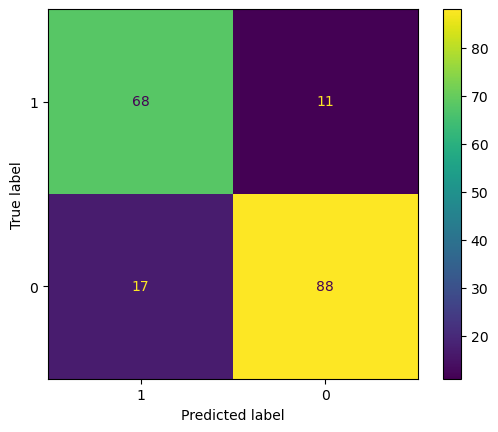

In [468]:
## Drawing Confusion matrix for Ada Boost Classfier Model with 11 features after hyperparameter tunning.
from sklearn import metrics
confusion_matrix_ABCF_model=metrics.confusion_matrix(Y_test1,abc_model_with_pm2_pred)
cm_logistic_display=metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_ABCF_model , display_labels=[1 ,  0])
cm_logistic_display.plot()
plt.show()

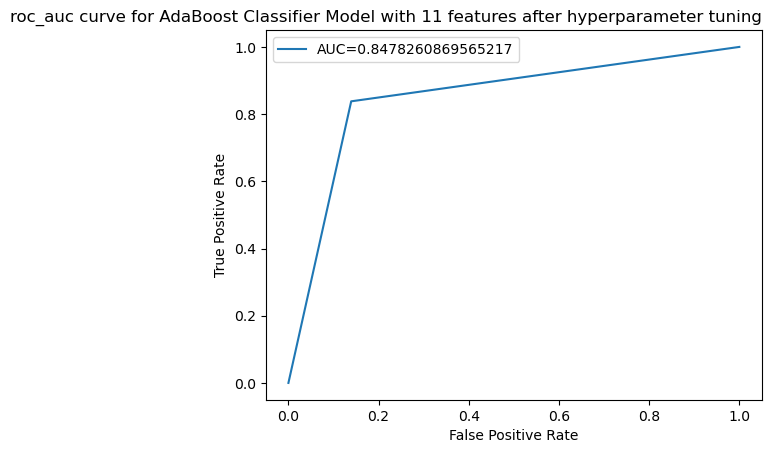

In [470]:
## plotting roc_auc_curve for Ada Boost Classifier Model with 11 Features after hyperparameter tunning
fpr,tpr, _= metrics.roc_curve(Y_test1,abc_model_with_pm2_pred)
auc_ABC_model=metrics.roc_auc_score(Y_test1,abc_model_with_pm2_pred)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC="+str(accuracy_score(Y_test1,abc_model_with_pm2_pred))])
plt.title("roc_auc curve for AdaBoost Classifier Model with 11 features after hyperparameter tuning" , loc="right")
plt.show()

## Model Performance Evaluation

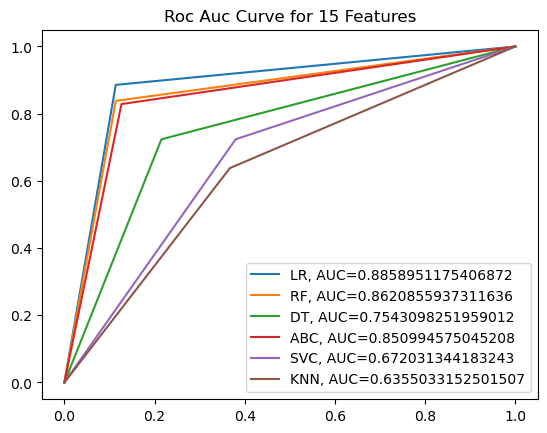

In [471]:
plt.figure(0).clf()
plt.title("Roc Auc Curve for 15 Features")


##For Logistic Regression
fpr,tpr, _= metrics.roc_curve(Y_test,Logitsic_model_pred)
auc_logistic_model=metrics.roc_auc_score(Y_test,Logitsic_model_pred)
plt.plot(fpr,tpr,label="LR, AUC="+str(auc_logistic_model))

##For Random Forest
fpr,tpr, _= metrics.roc_curve(Y_test,RF_model_pred)
auc_RF_model=metrics.roc_auc_score(Y_test,RF_model_pred)
plt.plot(fpr,tpr,label="RF, AUC="+str(auc_RF_model))

##For Decisio Tree
fpr,tpr, _= metrics.roc_curve(Y_test,DT_model_pred)
auc_DT_model=metrics.roc_auc_score(Y_test,DT_model_pred)
plt.plot(fpr,tpr,label="DT, AUC="+str(auc_DT_model))

##For Ada Boost 
fpr,tpr, _= metrics.roc_curve(Y_test,ABC_model_pred)
auc_ABC_model=metrics.roc_auc_score(Y_test,ABC_model_pred)
plt.plot(fpr,tpr,label="ABC, AUC="+str(auc_ABC_model))

##For Support Vector
fpr,tpr, _= metrics.roc_curve(Y_test,SVC_model_pred)
auc_SVC_model=metrics.roc_auc_score(Y_test,SVC_model_pred)
plt.plot(fpr,tpr,label="SVC, AUC="+str(auc_SVC_model))

##For KNN
fpr,tpr, _= metrics.roc_curve(Y_test,KNN_model_pred)
auc_KNN_model=metrics.roc_auc_score(Y_test,KNN_model_pred)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc_KNN_model))

plt.legend()

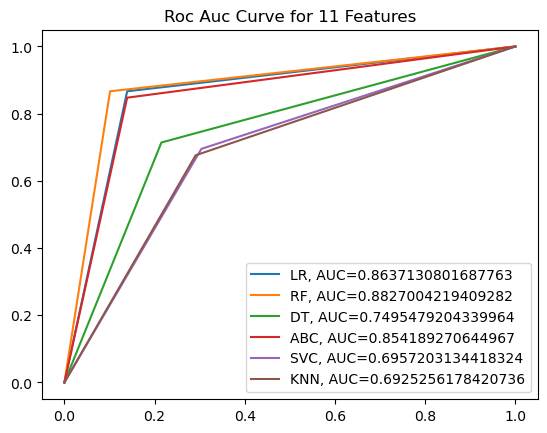

In [472]:
plt.figure(0).clf()
plt.title("Roc Auc Curve for 11 Features")

##For LR
fpr,tpr, _= metrics.roc_curve(Y_test1,LRF_model_test_pred)
auc_logistic_model=metrics.roc_auc_score(Y_test1,LRF_model_test_pred)
plt.plot(fpr,tpr,label="LR, AUC="+str(auc_logistic_model))

##For RF
fpr,tpr, _= metrics.roc_curve(Y_test1,RFF_model_pred)
auc_RF_model=metrics.roc_auc_score(Y_test1,RFF_model_pred)
plt.plot(fpr,tpr,label="RF, AUC="+str(auc_RF_model))

##For DT
fpr,tpr, _= metrics.roc_curve(Y_test1,DTF_model_pred)
auc_DT_model=metrics.roc_auc_score(Y_test1,DTF_model_pred)
plt.plot(fpr,tpr,label="DT, AUC="+str(auc_DT_model))

##For ABC
fpr,tpr, _= metrics.roc_curve(Y_test1,ABFC_model_pred)
auc_ABC_model=metrics.roc_auc_score(Y_test1,ABFC_model_pred)
plt.plot(fpr,tpr,label="ABC, AUC="+str(auc_ABC_model))

##For SVC
fpr,tpr, _= metrics.roc_curve(Y_test1,svcf_model_pred)
auc_SVC_model=metrics.roc_auc_score(Y_test1,svcf_model_pred)
plt.plot(fpr,tpr,label="SVC, AUC="+str(auc_SVC_model))

##For KNN
fpr,tpr, _= metrics.roc_curve(Y_test1,KNNF_model_pred)
auc_KNN_model=metrics.roc_auc_score(Y_test1,KNNF_model_pred)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc_KNN_model))

plt.legend()


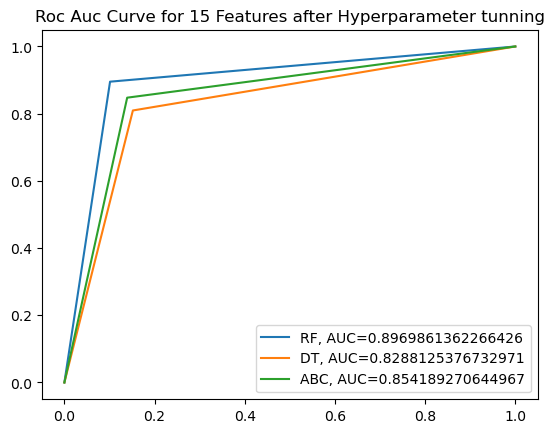

In [473]:
plt.figure(0).clf()
plt.title("Roc Auc Curve for 15 Features after Hyperparameter tunning")




##For Random Forest
fpr,tpr, _= metrics.roc_curve(Y_test,rfc_model_with_pm1_pred)
auc_RF_model=metrics.roc_auc_score(Y_test,rfc_model_with_pm1_pred)
plt.plot(fpr,tpr,label="RF, AUC="+str(auc_RF_model))

##For Decisio Tree
fpr,tpr, _= metrics.roc_curve(Y_test,dtc_model_with_pm1_pred)
auc_DT_model=metrics.roc_auc_score(Y_test,dtc_model_with_pm1_pred)
plt.plot(fpr,tpr,label="DT, AUC="+str(auc_DT_model))

##For Ada Boost 
fpr,tpr, _= metrics.roc_curve(Y_test,abc_model_with_pm1_pred)
auc_ABC_model=metrics.roc_auc_score(Y_test,abc_model_with_pm1_pred)
plt.plot(fpr,tpr,label="ABC, AUC="+str(auc_ABC_model))


plt.legend()

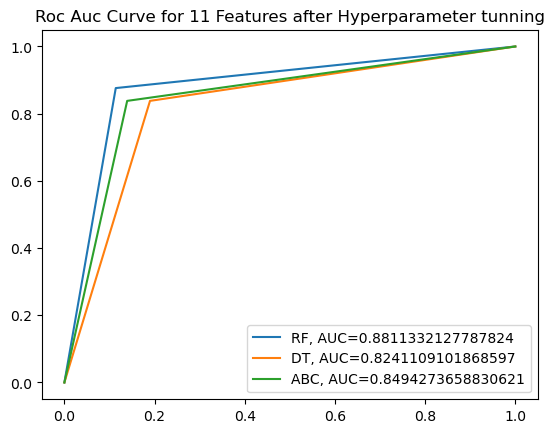

In [474]:
plt.figure(0).clf()
plt.title("Roc Auc Curve for 11 Features after Hyperparameter tunning")




##For Random Forest
fpr,tpr, _= metrics.roc_curve(Y_test1,rfc_model_with_pm2_pred)
auc_RF_model=metrics.roc_auc_score(Y_test1,rfc_model_with_pm2_pred)
plt.plot(fpr,tpr,label="RF, AUC="+str(auc_RF_model))

##For Decisio Tree
fpr,tpr, _= metrics.roc_curve(Y_test1,dtc_model_with_pm2_pred)
auc_DT_model=metrics.roc_auc_score(Y_test1,dtc_model_with_pm2_pred)
plt.plot(fpr,tpr,label="DT, AUC="+str(auc_DT_model))

##For Ada Boost 
fpr,tpr, _= metrics.roc_curve(Y_test1,abc_model_with_pm2_pred)
auc_ABC_model=metrics.roc_auc_score(Y_test1,abc_model_with_pm2_pred)
plt.plot(fpr,tpr,label="ABC, AUC="+str(auc_ABC_model))


plt.legend()

# Building a Predictive System

In [487]:
input_data = (54,1,2,150,195,0,1,122,0,0,2)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = abc_model_with_pm2.predict(input_data_reshaped)
print(prediction)

[0]
